## Demo of Curve fit Method for 3D lithium Ion Batteries
A curve fitting procedure to determine the discharge rate constant, the n factor for the discharge rate, and the specific capacity. We use the model outlined by *R. Tian & S. Park et. al.* https://www.nature.com/articles/s41467-019-09792-9

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../liibattery3d')

import pandas as pd

import liib3d

In [2]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

### The Dataset of Compiled 3D lithium Ion Batteries
We explore the dataset of the battery capacity as a function of discharge rate

In [3]:
# load dataset
filepath = os.path.join('../liibattery3d/data', 'liibattery3d_performancelog.xls')
dframe = pd.read_excel(filepath, sheet_name='3_CapacityRate',
                       header=[0, 1, 2])
dframe.head()
# dframe.columns[0]

Paper # 1                                              Paper #4  \
   set #1 E                   set #1 M                   set #1 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.026661       110.350768  0.287220        92.322541  0.048147   
1  0.147635        99.595634  0.566392        82.739099  0.121655   
2  0.279776        96.285964  0.836257        72.391035       NaN   
3  0.566392        85.000231  1.406232        52.891525       NaN   
4  0.838584        75.122293  2.810928        26.834216       NaN   

                                                                          ...  \
                    set #2 E                   set #3 E                   ...   
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)  ...   
0         0.355790  0.059551         0.363598  0.096021         0.364299  ...   
1         0.170715  0.162193         0.128205       NaN              NaN  ...   
2              NaN       NaN              NaN       NaN              NaN  ...   
3              NaN       NaN              NaN       NaN              NaN  ...   
4              NaN       NaN              NaN       NaN              NaN  ...   

  Paper #23                                              Paper #27  \
   set #1 E                   set #2 E                    set #1 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)     C rate   
0  8.712551        83.585488  4.850202       122.836782   2.004132   
1  7.425101       108.152845  3.587045       126.225383   4.979339   
2  6.137652       117.471497  2.299595       127.919683   9.938017   
3  4.850202       122.836782  1.012146       129.896367  20.061983   
4  3.587045       126.225383  7.400810       104.481860        NaN   

                    Paper #31                                               
                     set #1 E                    set #2 E                   
  Capacity (mAh/g)     C rate Capacity (mAh/g)     C rate Capacity (mAh/g)  
0       134.186747  30.141129        61.467890  30.100806        24.770642  
1       134.512048   9.979839        79.816514   9.939516       131.192661  
2       124.753012   4.979839       244.954128   4.939516       206.422018  
3        84.740964   0.423387       301.834862   0.463710       311.009174  
4              NaN        NaN              NaN        NaN              NaN  

[5 rows x 40 columns]

### Below we visualize the dataset of the battery capacity as a function of discharge rate. 
We will use this dataset to determine the parameters of the model: the discharge rate constant, the n factor for the discharge rate, and the specific capacity

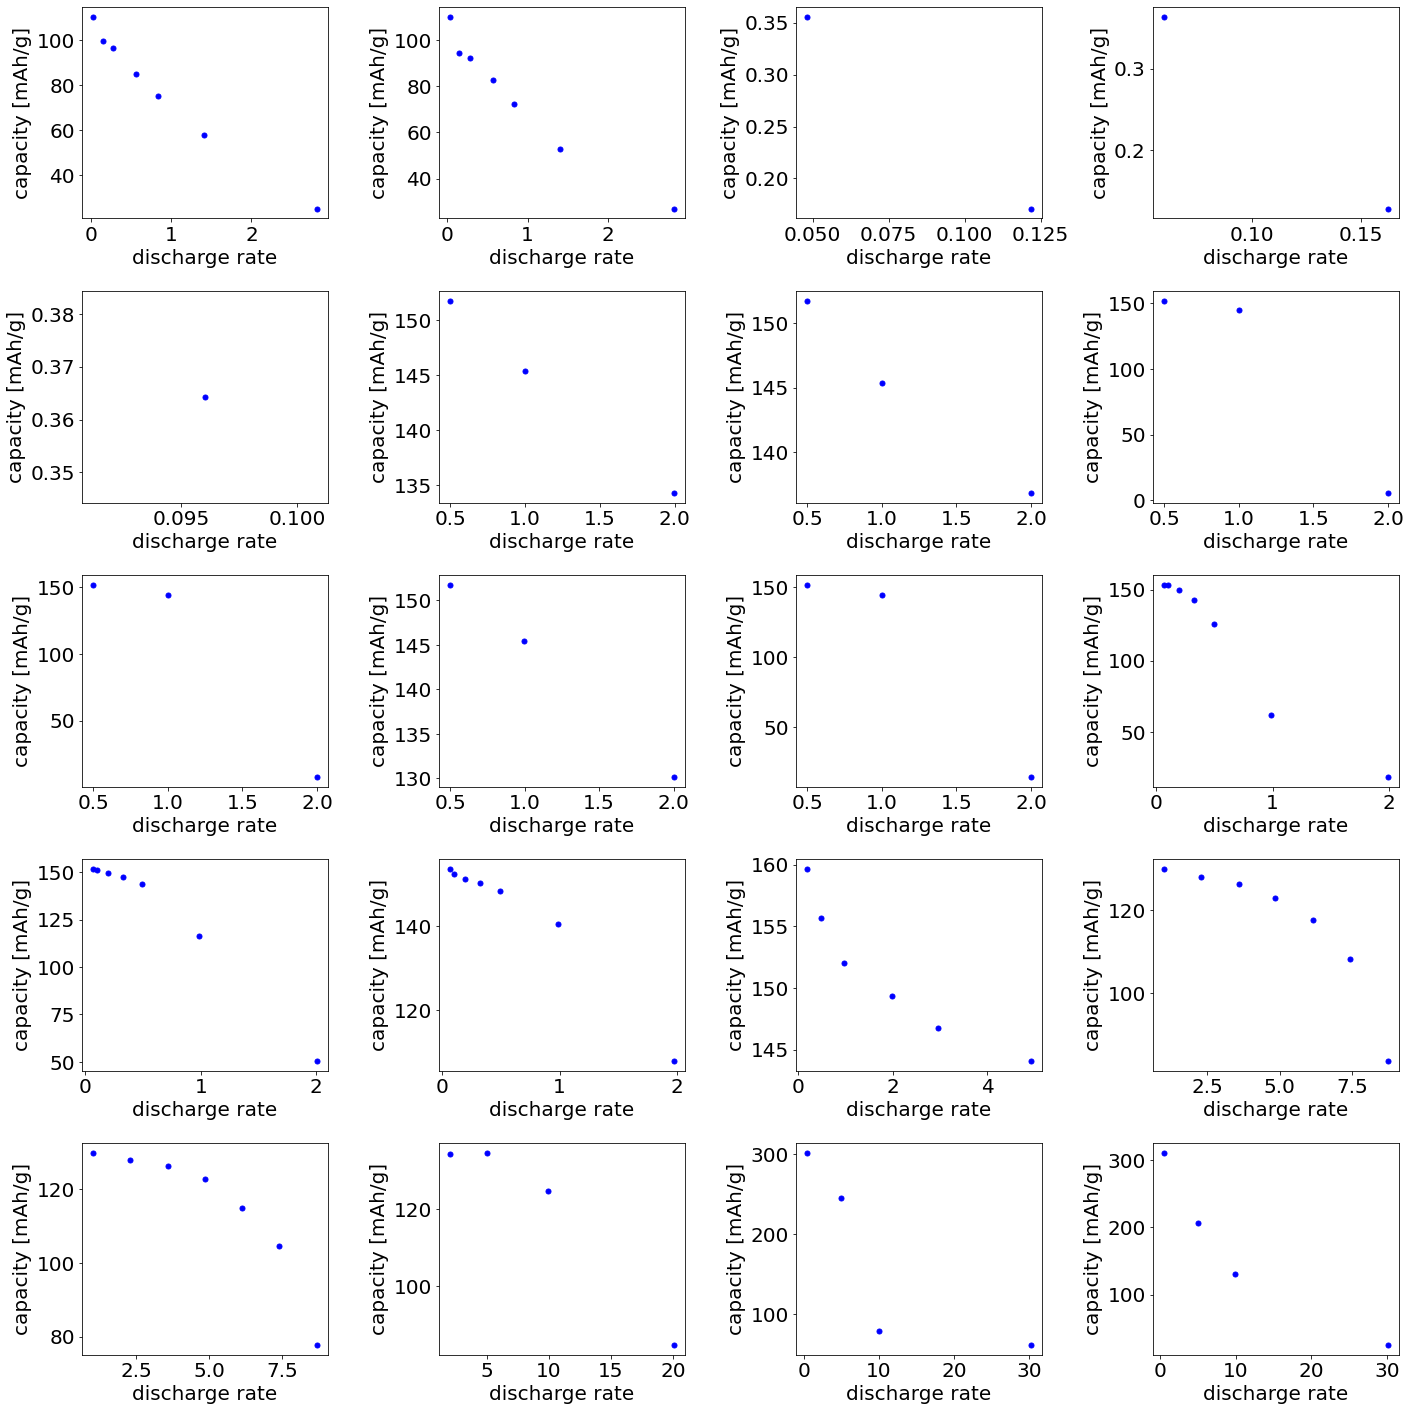

In [4]:
fig1 = plt.figure(figsize=(20,20))

for i in range(int(len(dframe.columns)/2)):
    ax = plt.subplot(5, 4, i+1)  # five rows and four columns
    # even columns for xdata; odd columns for ydata
    # even columns for xdata; odd columns for ydata
    # then sort values by the even(th) columns
    indeven = (2 * i)
    indodd = indeven + 1
    data = dframe.iloc[:, [indeven, indodd]].sort_values(by=dframe.columns[indeven])
    xdata = data[dframe.columns[indeven]].to_numpy()
    ydata = data[dframe.columns[indodd]].to_numpy()
    ax.plot(xdata, ydata,
            color='b', marker='o',
            markersize=5, linestyle='None',
            label='data')
    ax.set_xlabel('discharge rate')
    ax.set_ylabel('capacity [mAh/g]') # mass normalized capacity
    plt.tight_layout()

#### Fig. 1 Mass normalized capacity as a function of the discharge rate of 3d lithium ion batteries
In general we note that an increase in the discharge rate, also know as the high-power performance of the battery, results in a lower battery capacity *R. Tian & S. Park et. al.* https://www.nature.com/articles/s41467-019-09792-9

### Compare the predicted vs known capacity as a function of battery discharge
Next we fit the capacity vs rate discharge model to the dataset. 
We use this dataset to determine the parameters of the model: the discharge rate constant, the n factor for the discharge rate, and the specific capacity. We use these parameters to make predictions of the mass normalized capacity, and we compare these results to the known values.

In [5]:
#The fit module fits the dataset above
liib3d.fitliib3d()  # we call the fit module
# And the fit module writes the optimized parameters into a csv file
filepath_out = os.path.join('../liibattery3d/data', 'fitparametersliib3d.csv')
dframe_out = pd.read_csv(filepath_out)
dframe_out.head()

../liibattery3d/liib3d.py:139: RuntimeWarning: invalid value encountered in power
  (Rdischarge * tau)**n *
../liibattery3d/liib3d.py:140: RuntimeWarning: invalid value encountered in power
  (1 - np.exp(- (Rdischarge * tau)**(- n)))


,Paper #,Set,tau,n,Q
0,1.0,1.0,0.485641,1.302511,106.109020
1,1.0,1.0,0.487356,1.171666,105.112479
2,4.0,1.0,0.000000,0.000000,0.000000
3,4.0,2.0,0.000000,0.000000,0.000000
4,4.0,3.0,0.000000,0.000000,0.000000


Note that we fit only sets in the dataset of **Fig.1** with four or  more data points

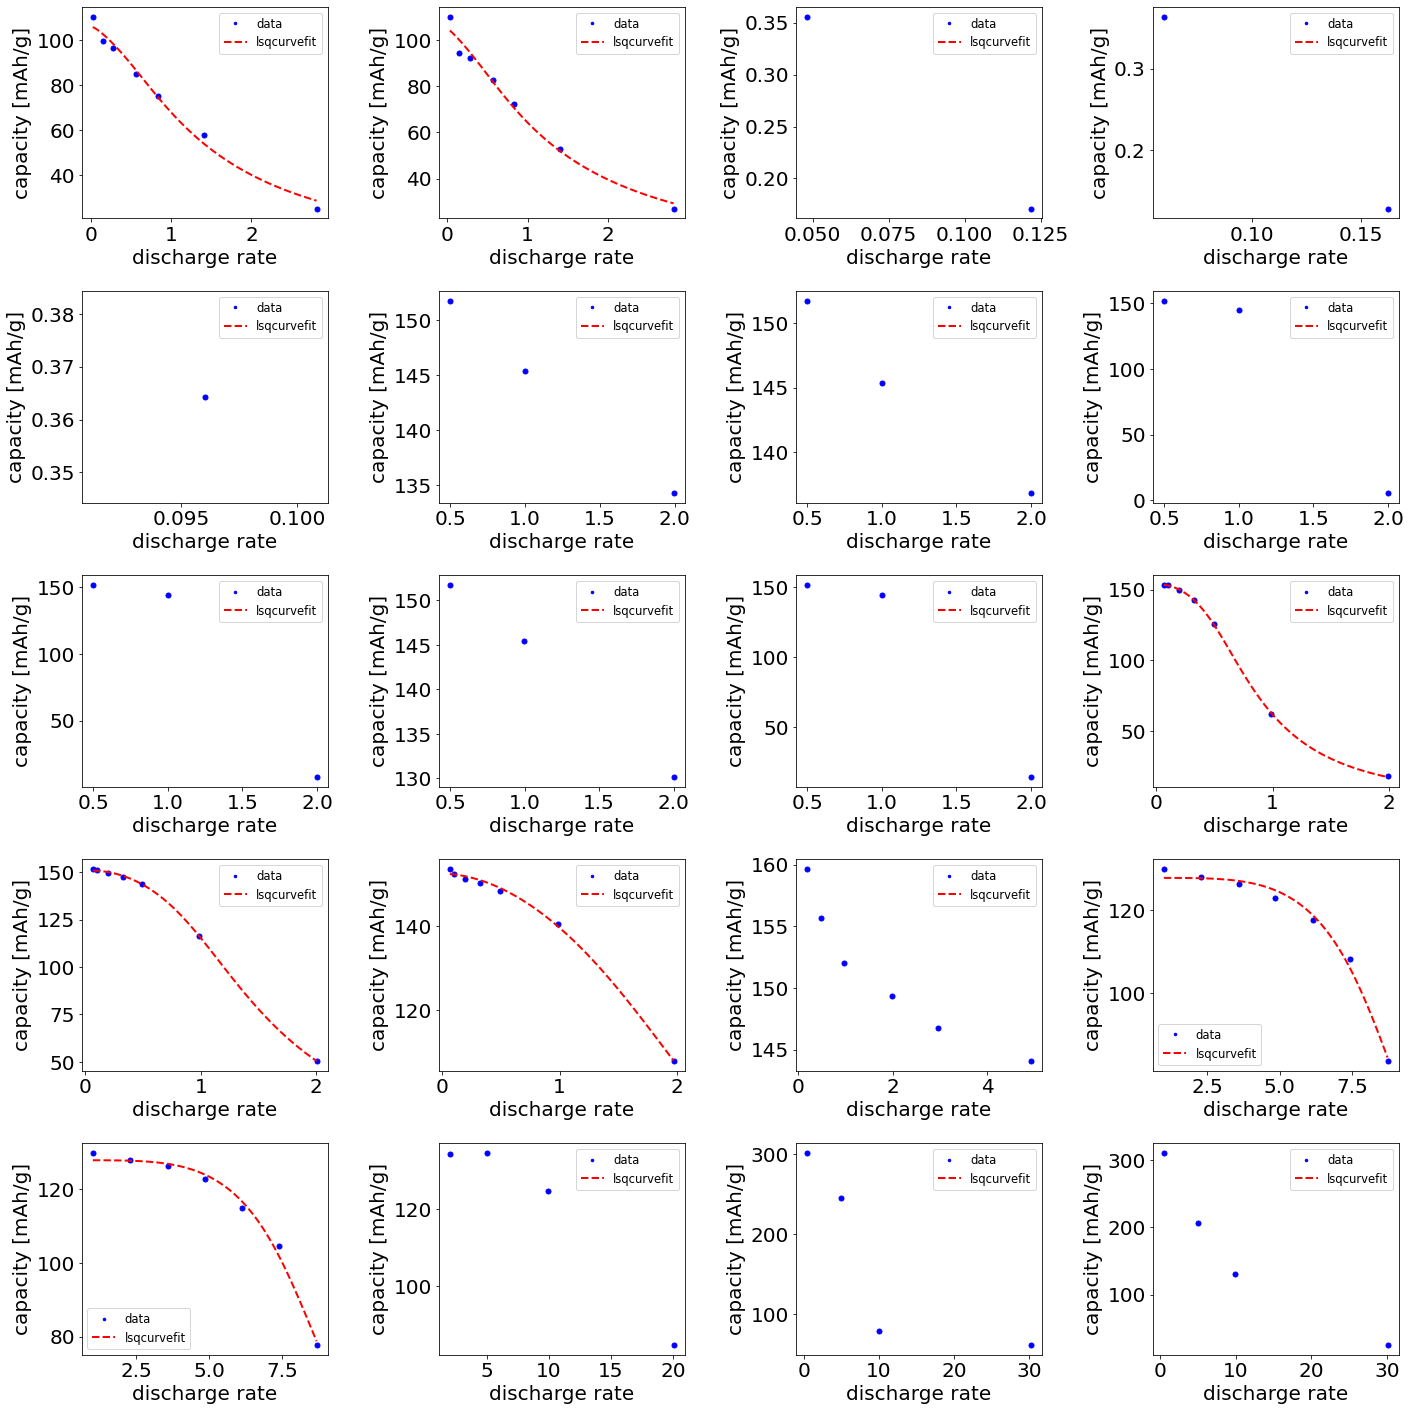

In [6]:
# plot for predicted capacity (with optimized parameters) compared to known (measured) capacity outputs
fig2 = plt.figure(figsize=(20,20))

for i in range(int(len(dframe.columns)/2)):
    # test data
    # even columns for xdata; odd columns for ydata
    # then sort values by the even(th) columns
    indeven = (2 * i)
    indodd = indeven + 1
    data = dframe.iloc[:, [indeven, indodd]].sort_values(by=dframe.columns[indeven])
    xdata = data[dframe.columns[indeven]].to_numpy()
    ydata = data[dframe.columns[indodd]].to_numpy()
    #Prediction
    # parameters
    tau = dframe_out.loc[i, "tau"]
    n = dframe_out.loc[i, "n"]
    specificQ = dframe_out.loc[i, "Q"]
    # use fit parameters to predict capacity
    Rdischarge = np.linspace(xdata[0], xdata[-1], 100)
    normQopt = liib3d.fitfunc(Rdischarge, tau, n, specificQ)  # call model function
    # compare predicted capacity to known capacity in ydata
    ax = plt.subplot(5, 4, (i + 1))  # five rows and four columns
    ax.plot(xdata, ydata,
            color='b', marker='o',
            markersize=5, linestyle='None',
            label='data')
    ax.plot(Rdischarge, normQopt, 
            color='r',
            linewidth=2, linestyle='--',
            label='lsqcurvefit')
    plt.legend(markerscale=0.5, fontsize='xx-small')
    ax.set_xlabel('discharge rate')
    ax.set_ylabel('capacity [mAh/g]') # mass normalized capacity
    plt.tight_layout()

#### Fig. 2 Comparison of predicted vs known capacity as a function of battery discharge
In **Fig. 2** note that we fit only sets in the dataset of **Fig.1** with four or  more data points

### Test Case to illustrate the core function of curvefit module and visualize the optimized parameters

In [7]:
filepath = os.path.join('../liibattery3d/data','capacityratepaper1set1.csv')
dframe = pd.read_csv(filepath)
dframe.columns

Index(['C rate', 'Capacity (mAh/g)'], dtype='object')

In [8]:
dframe.head()

,C rate,Capacity (mAh/g)
0,0.026661,110.350768
1,0.147635,99.595634
2,0.279776,96.285964
3,0.566392,85.000231
4,0.838584,75.122293


In [9]:
# parameters
tau = 0.5; n = 1; Qcapacity = 100;
params0 = [tau, n, Qcapacity]  # intial guess parameter
popt, _ = liib3d.fit(params0, filename=filepath)

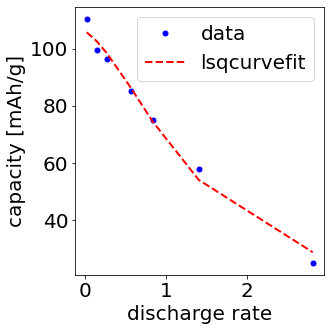

In [10]:
### Visualize Result with optimized parameters
# test data
xdata = dframe.iloc[: , 0].to_numpy()
ydata = dframe.iloc[: , 1].to_numpy()
# parameters
tau = popt[0]
n = popt[1]
specificcapacity = popt[2]
# use fit parameters to predict capacity
Rdischarge = xdata
normQopt = liib3d.fitfunc(Rdischarge, tau, n, specificcapacity)
# compare predicted capacity to known capacity in ydata
fig = plt.figure(figsize=(5, 5))
ax = fig.subplots()
ax.plot(xdata, ydata,
        color='b', marker='o',
        markersize=5, linestyle='None',
        label='data')
ax.plot(Rdischarge, normQopt, 
        color='r',
        linewidth=2, linestyle='--',
        label='lsqcurvefit')
ax.set_xlabel('discharge rate')
ax.set_ylabel('capacity [mAh/g]')  #mass normalized capacity
ax.legend()
plt.tight_layout()